# Yellowbrick Target Visualizers

This notebook serves as a quick reference to the Yellowbrick functionality with regards to target analysis for visualizing dependent variables in supervised learning.

Source: https://www.scikit-yb.org/en/latest/api/target/index.html

## Balanced Binning Reference

[]() | []()
---------- | -------------
Visualizer | ```BalancedBinningReference```
Quick Method | ```balanced_binning_reference()```
Models | Classification
Workflow | Feature analysis, Target analysis, Model selection

In [23]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import numpy as np

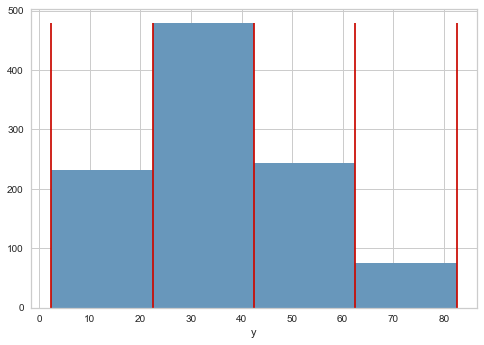

In [2]:
from yellowbrick.datasets import load_concrete
from yellowbrick.target import BalancedBinningReference

# Load the concrete dataset
X, y = load_concrete()

# Instantiate the visualizer
visualizer = BalancedBinningReference()
#default bins=4

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Quick Method

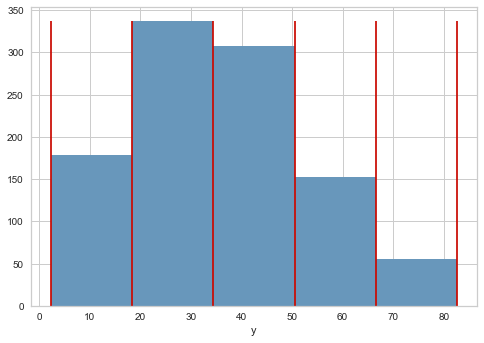

BalancedBinningReference(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1A47C2E48>,
                         bins=5, target='y')

In [11]:
from yellowbrick.datasets import load_concrete
from yellowbrick.target import balanced_binning_reference

# Load the dataset
X, y = load_concrete()

# Use the quick method and immediately show the figure
balanced_binning_reference(y, bins=5)

## Class Balance
[]() | []()
---------- | -------------
Visualizer | ```ClassBalance```
Quick Method | ```class_balance()```
Models | Classification
Workflow | Feature analysis, Target analysis, Model selection

One of the biggest challenges for classification models is an imbalance of classes in the training data. This function vizualizes the relationship of the support for each class in both the training and test data by displaying how frequently each class occurs as a bar graph.

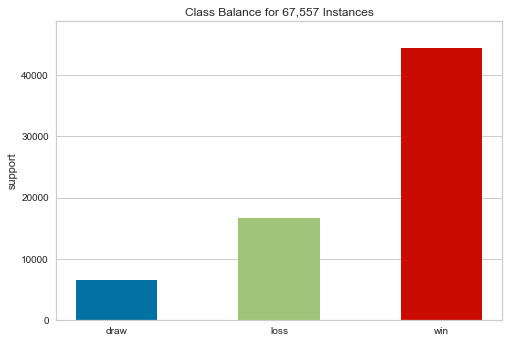

In [18]:
# Used to determine class balance, and if downsampling majorities, upsampling minorities or stratified sampling, etc. is needed.

from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance

# Load the classification dataset
X, y = load_game()

# Instantiate the visualizer
visualizer = ClassBalance(labels=["draw", "loss", "win"])

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

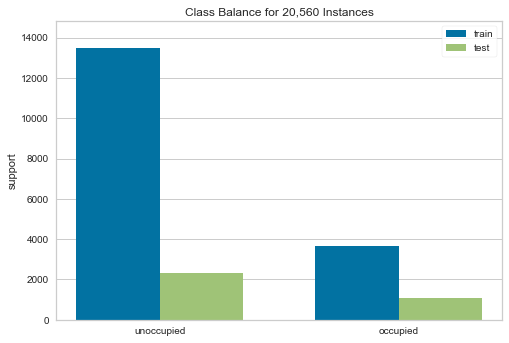

In [19]:
# Can be used to see if test/train split is relatively even

from sklearn.model_selection import TimeSeriesSplit

from yellowbrick.datasets import load_occupancy
from yellowbrick.target import ClassBalance

# Load the classification dataset
X, y = load_occupancy()

# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Instantiate the visualizer
visualizer = ClassBalance(labels=["unoccupied", "occupied"])

visualizer.fit(y_train, y_test)        # Fit the data to the visualizer
visualizer.show()                      # Finalize and render the figure

### Quick Method

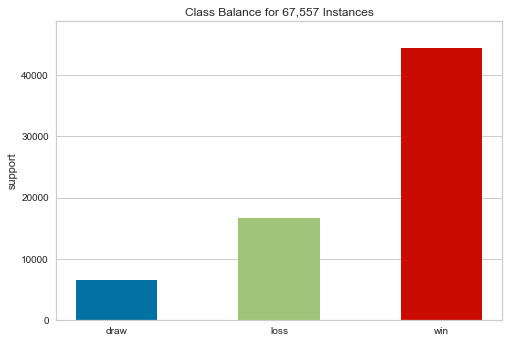

ClassBalance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1A71F4B88>)

In [20]:
from yellowbrick.datasets import load_game
from yellowbrick.target import class_balance

# Load the dataset
X, y = load_game()

# Use the quick method and immediately show the figure
class_balance(y)

## Feature Correlation
[]() | []()
---------- | -------------
Visualizer | ```FeatureCorrelation```
Quick Method | ```feature_correlation()```
Models | Regression/Classification/Clustering
Workflow | Feature Engineering/Model Selection

This visualizer calculates Pearson correlation coefficients and mutual information between features and the dependent variable. This visualization can be used in feature selection to identify features with high correlation or large mutual information with the dependent variable.

### Pearson Correlation

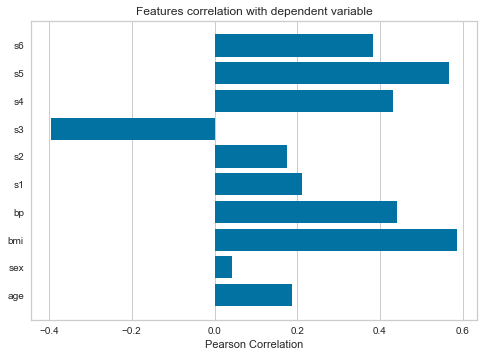

In [24]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation

# Load the regression dataset
data = datasets.load_diabetes()
X, y = data['data'], data['target']

# Create a list of the feature names
features = np.array(data['feature_names'])

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

### Mutual Information - Regression

It is very important to specify discrete features when calculating mutual information because the calculation for continuous and discrete variables are different.

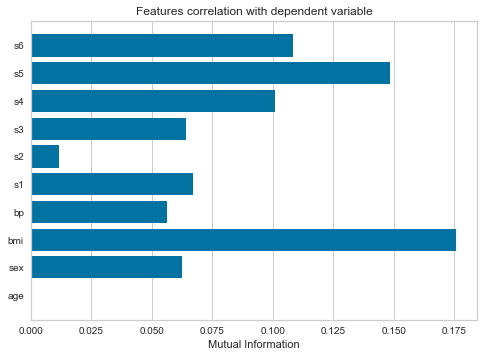

In [25]:
# Create a list of the discrete features
discrete = [False for _ in range(len(features))]
discrete[1] = True

# Instantiate the visualizer
visualizer = FeatureCorrelation(method='mutual_info-regression', labels=features)

visualizer.fit(X, y, discrete_features=discrete, random_state=0)
visualizer.show()

### Mutual Information - Classification



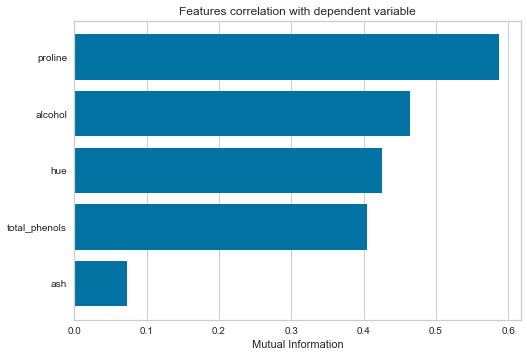

In [26]:
import pandas as pd

from sklearn import datasets
from yellowbrick.target import FeatureCorrelation

# Load the regression dataset
data = datasets.load_wine()
X, y = data['data'], data['target']
X_pd = pd.DataFrame(X, columns=data['feature_names'])

# Create a list of the features to plot
features = ['alcohol', 'ash', 'hue', 'proline', 'total_phenols']

# Instaniate the visualizer
visualizer = FeatureCorrelation(
    method='mutual_info-classification', feature_names=features, sort=True
)

visualizer.fit(X_pd, y)        # Fit the data to the visualizer
visualizer.show()              # Finalize and render the figure

### Quick Method

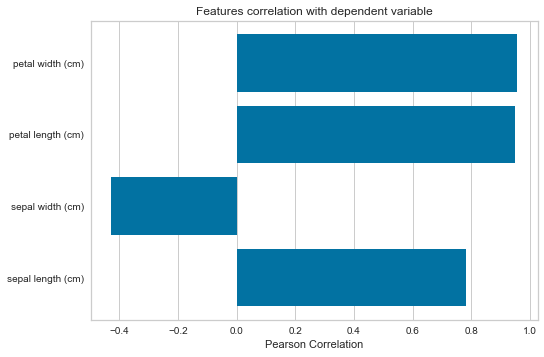

<Figure size 576x396 with 0 Axes>

In [28]:
from yellowbrick.target.feature_correlation import feature_correlation

#Load the diabetes dataset
data = datasets.load_iris()
X, y = data['data'], data['target']

features = np.array(data['feature_names'])
visualizer = feature_correlation(X, y, labels=features)
plt.tight_layout()